1. Word Cloud

2. Histogram of frequency of ratings

3. Boxplot for central tendency and spread

4. No. of reviews for each product in descending order

5. Correlation matrix: The correlation coefficient between "Price in Dollars" and "Rating"

6. One-star rating for all reviews

7. Two-star rating for all reviews

8. Three-star rating for all reviews

9. Four-star rating for all reviews

10. Five-star rating for all reviews

11. Average of ratings for each product

12. No. of reviews quaterly

13. Interactive scatterplot of "Price in Dollars" and "Rating"

14. Interactive Bar Chart of Rating for Each Product

15. Interactive Scatter plot for ratings for each product in months

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\22-Dec\\EDA\\Amazon_Tokenization.xlsx')

In [3]:
df.head()

Website     Product Name Product Number  Price in Dollars         User  \
0  Amazon  Apple iPhone XR     B07P6Y7954             236.9        Terri   
1  Amazon  Apple iPhone XR     B07P6Y7954             236.9         lala   
2  Amazon  Apple iPhone XR     B07P6Y7954             236.9     Karly J.   
3  Amazon  Apple iPhone XR     B07P6Y7954             236.9        Jerry   
4  Amazon  Apple iPhone XR     B07P6Y7954             236.9  Lisa Luster   

                       Title             Date  Rating  \
0  st time apple iphone user  August 10, 2020       4   
1            amazing quality    June 10, 2023       5   
2           overall good buy     May 21, 2023       4   
3  the price and reliability    June 15, 2023       5   
4                  no issues     May 26, 2023       5   

                                              Review  
0  ['receive', 'estimation', 'brand', 'new', 'mar...  
1  ['first', 'bit', 'sketched', 'order', 'online'...  
2  ['work', 'great', 'problem', 'come', 'tempered...  
3  ['use', 'personal', 'use', 'come', 'perfect', ...  
4  ['order', 'daughter', 'buy', 'grandson', 'one'...

In [4]:
df.shape

(18774, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18774 entries, 0 to 18773
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Website           18774 non-null  object 
 1   Product Name      18774 non-null  object 
 2   Product Number    18774 non-null  object 
 3   Price in Dollars  16484 non-null  float64
 4   User              18774 non-null  object 
 5   Title             18701 non-null  object 
 6   Date              18774 non-null  object 
 7   Rating            18774 non-null  int64  
 8   Review            18774 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
df.describe()

Price in Dollars        Rating
count      16484.000000  18774.000000
mean         578.901653      3.922659
std          371.746010      1.497307
min          129.990000      1.000000
25%          236.900000      3.000000
50%          657.680000      5.000000
75%         1001.830000      5.000000
max         1224.970000      5.000000

In [7]:
print(df.isnull().sum())

Website                0
Product Name           0
Product Number         0
Price in Dollars    2290
User                   0
Title                 73
Date                   0
Rating                 0
Review                 0
dtype: int64


# Word Cloud

!pip install WordCloud

In [8]:
import pandas as pd

# Read the Excel file
xls = pd.ExcelFile("C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\22-Dec\\EDA\\Amazon_Lemmatization.xlsx")
df = pd.read_excel(xls)

# Select only the "Review" column
df = df[["Review"]]

# Save the modified DataFrame back to Excel
df.to_excel("New_Amazon_Reviews.xlsx", index=False)  # Modify the filename as needed


In [9]:
# Read the modified Excel file containing only the "Review" column
df = pd.read_excel("New_Amazon_Reviews.xlsx")

# Convert the "Review" column to a text file
with open("reviews.txt", "w", encoding="utf-8") as file:
    for review in df["Review"]:
        file.write(str(review) + "\n")


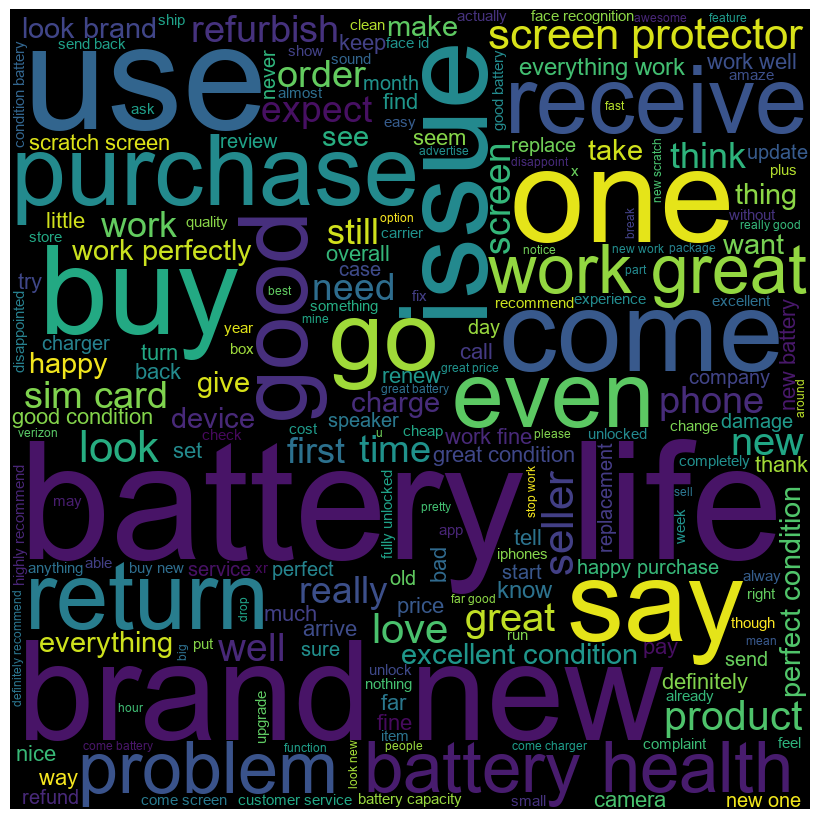

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Read the text file containing reviews
with open("reviews.txt", "r", encoding="utf-8") as file:
    reviews = file.readlines()

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the reviews
for review in reviews:
    review = review.strip()  # Remove newline characters
    tokens = review.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens) + " "

# Set the font family to Arial
font_path = 'C:/Windows/Fonts/arial.ttf' 
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      font_path=font_path,
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


# Exploring the Frequency Distribution of Ratings

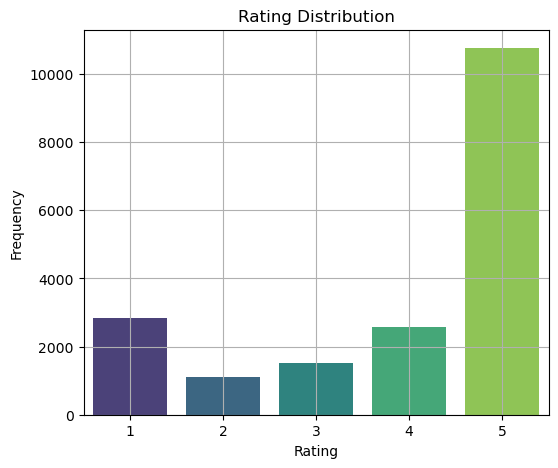

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\22-Dec\\EDA\\Amazon_Tokenization.xlsx")

# Count the frequency of each rating
rating_counts = df['Rating'].value_counts(sort=False)

# Create a bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')

# Show the graph
plt.grid(True)  # Add grid lines
plt.show()


# Visualizing Rating Distribution and Central Tendency with Boxplot

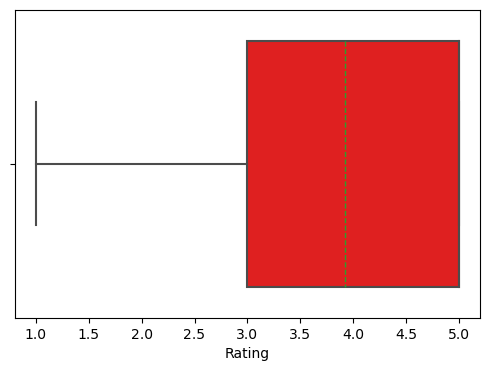

In [12]:
#Boxplot shows central tendency and spread

import seaborn as sns

plt.figure(figsize=(6, 4))

sns.boxplot(x='Rating', data=df, whis=5, color='Red', showmeans=True, meanline=True)

# Show the plot
plt.show()


# Frequency Distribution of Reviewed Products

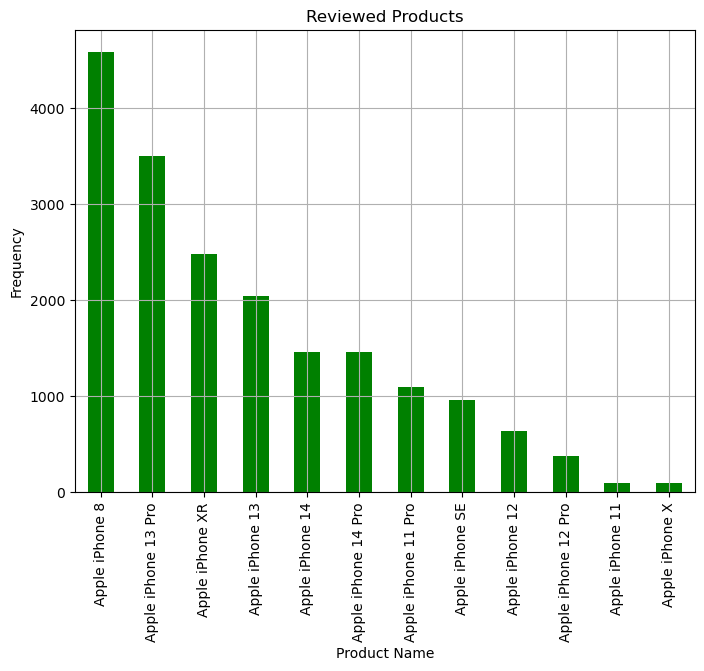

In [29]:
# No. of reviews for each product

most_sold_products = df['Product Name'].value_counts().nlargest(12)

# Create a bar plot to visualize the frequency of the most sold products
plt.figure(figsize=(8, 6))
most_sold_products.plot(kind='bar', color='green')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.title('Reviewed Products')
plt.grid(True)  # Add grid lines
plt.show()

In [30]:
# Correlation matrix
corr = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap="Blues")
plt.title('Correlation Heatmap')
plt.show()

#The correlation coefficient between "Price in Dollars" and "Rating" is -0.11, indicating a weak negative correlation.
# This means that as the "Price in Dollars" increases, the "Rating" tends to decrease slightly.

ValueError: could not convert string to float: 'Amazon'

# 1-5 Star Rating Distribution Across Product Categories

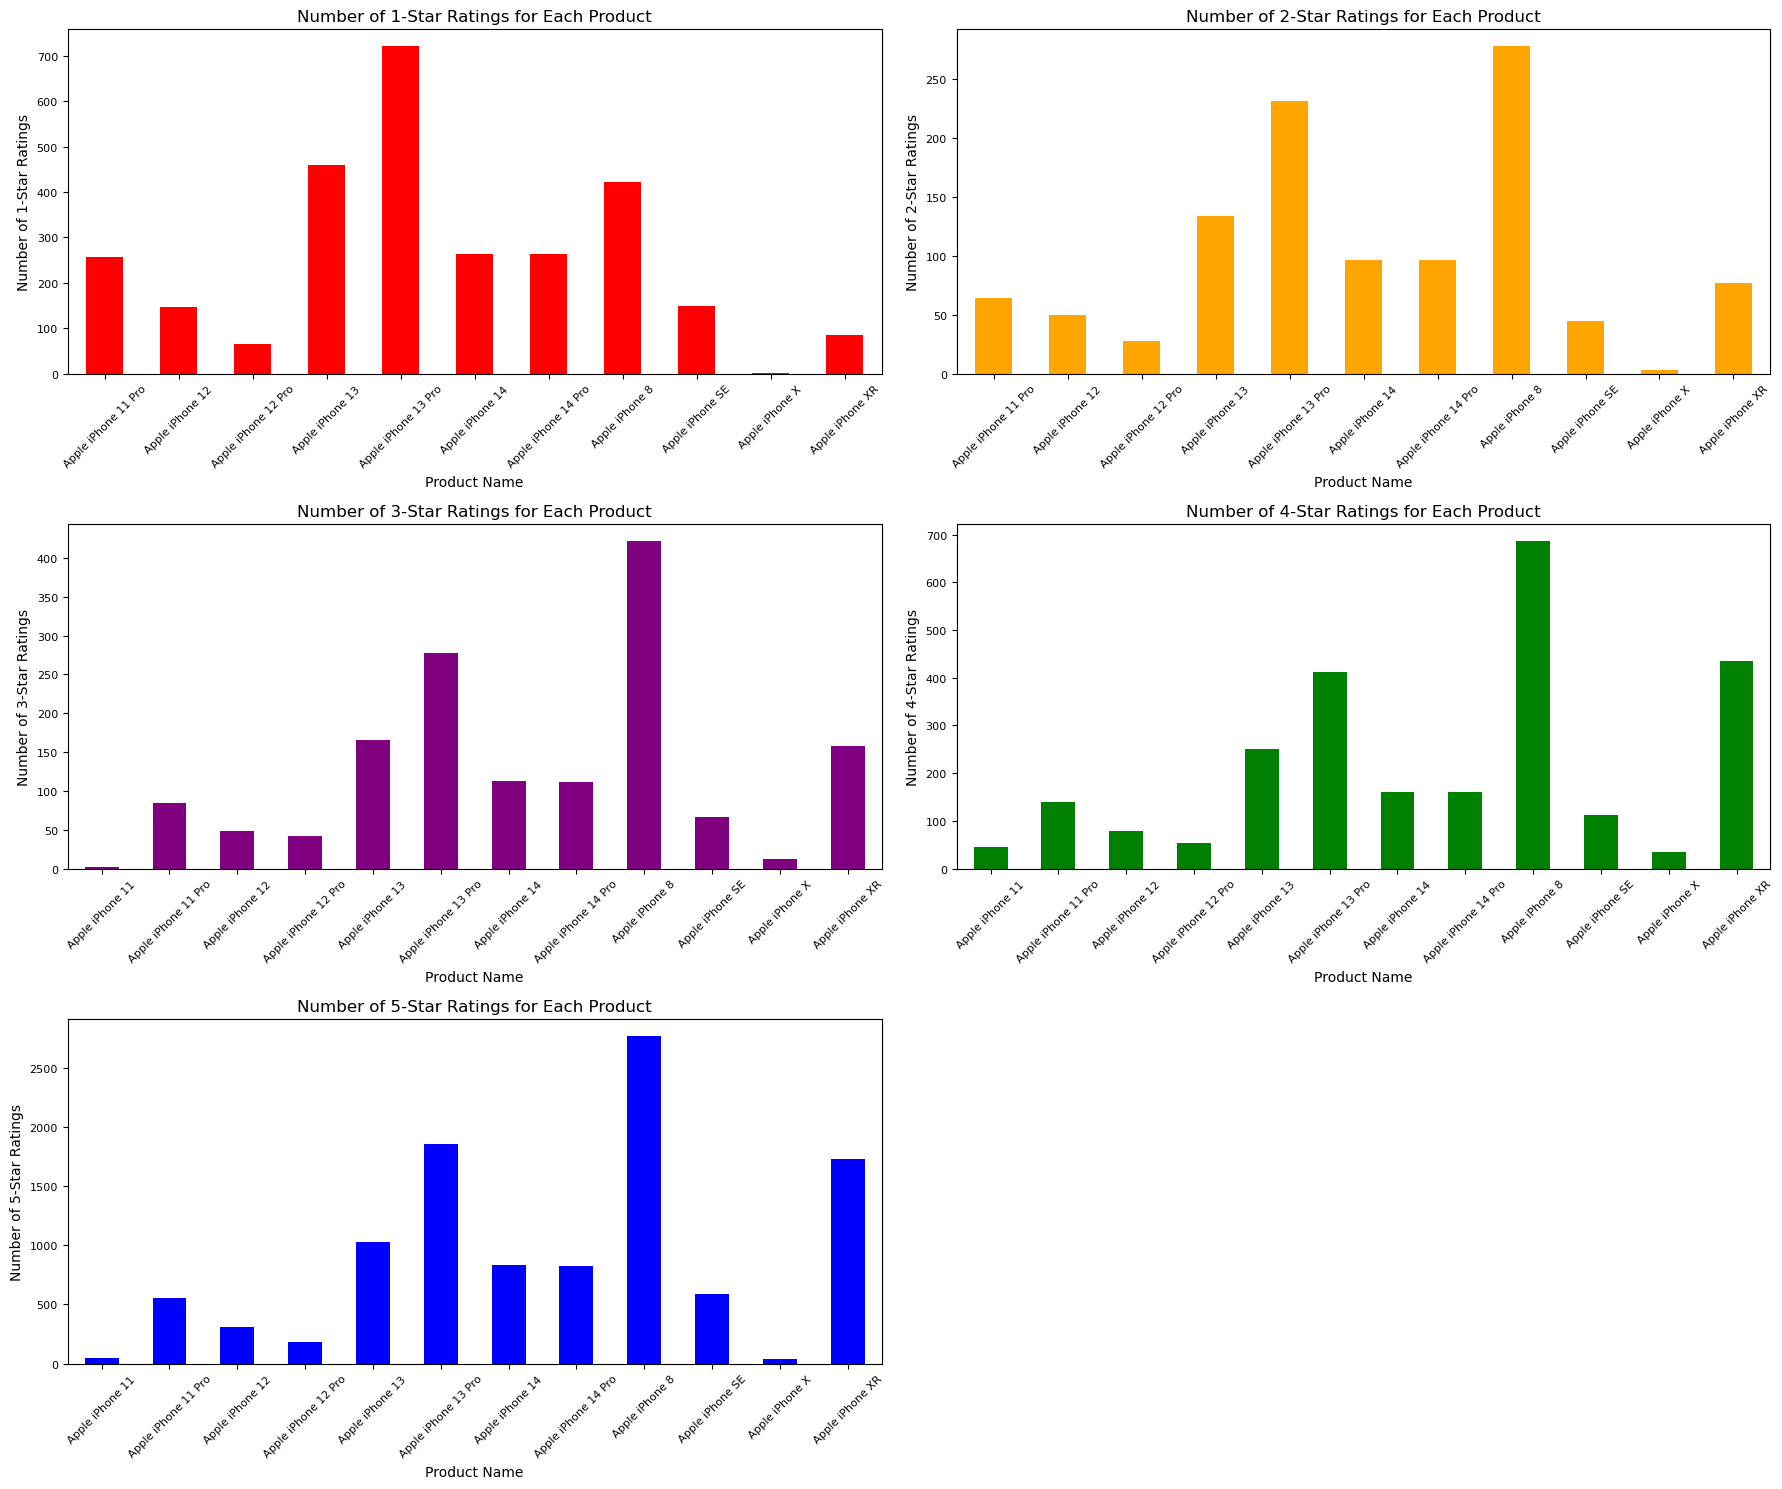

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame 'df' with the necessary data
df = pd.read_excel("C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\22-Dec\\EDA\\Amazon_Tokenization.xlsx")

# Define the ratings and their corresponding colors
ratings_colors = {
    1: 'red',
    2: 'orange',
    3: 'purple',
    4: 'green',
    5: 'blue'
}

# Calculate the number of rows and columns for the grid
num_rows = 3
num_cols = 2

# Create subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the ratings to loop through
ratings = [1, 2, 3, 4, 5]

# Loop through ratings and create plots for each
for i, rating in enumerate(ratings):
    ratings_df = df[df['Rating'] == rating]
    ratings_count_per_product = ratings_df.groupby('Product Name').size()
    
    # Plot the number of ratings for each product with custom color
    ratings_count_per_product.plot(kind='bar', color=ratings_colors[rating], ax=axes[i])
    
    # Set plot labels and title
    axes[i].set_xlabel('Product Name', fontsize=10)
    axes[i].set_ylabel(f'Number of {rating}-Star Ratings', fontsize=10)
    axes[i].set_title(f'Number of {rating}-Star Ratings for Each Product', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Hide any unused subplots
for i in range(len(ratings), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and spacing
plt.tight_layout()

# Show the plot grid
plt.show()


# Distribution of Ratings for Each Product

In [15]:
import pandas as pd
import plotly.express as px

# Assuming you have loaded your DataFrame 'df' with the necessary data
df = pd.read_excel("C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\22-Dec\\EDA\\Amazon_Tokenization.xlsx")

# Define the ratings and their corresponding colors
ratings_colors = {
    1: 'red',
    2: 'orange',
    3: 'purple',
    4: 'green',
    5: 'blue'
}

# Group the data by 'Product Name' and 'Rating' and calculate the count for each combination
product_rating_counts = df.groupby(['Product Name', 'Rating']).size().reset_index(name='Count')

# Create an interactive bar plot using Plotly Express with a rainbow color palette
fig = px.bar(product_rating_counts, x='Product Name', y='Count', color='Rating',
             labels={'Product Name': 'Product Name', 'Count': 'Number of Ratings'},
             title='Number of Ratings for Each Product by Rating',
             color_discrete_sequence=px.colors.sequential.Rainbow)

# Customize the appearance
fig.update_xaxes(tickangle=-45)
fig.update_layout(legend_title_text='Rating')
fig.show()


# Average Rating and Number of Users for Each Product

In [17]:
import pandas as pd
import plotly.express as px

# Assuming you have loaded your DataFrame 'df' with the necessary data
df = pd.read_excel("C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\22-Dec\\EDA\\Amazon_Tokenization.xlsx") 

# Calculate average ratings per product
average_ratings_per_product = df.groupby('Product Name')['Rating'].mean().reset_index()

# Calculate the number of users per product
users_per_product = df['Product Name'].value_counts().reset_index()
users_per_product.columns = ['Product Name', 'Number of Reviews']

# Merge the two dataframes on 'Product Name'
merged_data = pd.merge(average_ratings_per_product, users_per_product, on='Product Name')

# Create an interactive bar plot using Plotly
fig = px.bar(merged_data, x='Product Name', y='Rating', color='Number of Reviews',
             labels={'Rating': 'Average Rating', 'Product Name': 'Product Name', 'Number of Reviews': 'Number of Reviews'},
             title='Average Rating and Number of Reviews for Each Product')

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=-45)

# Show the interactive plot
fig.show()


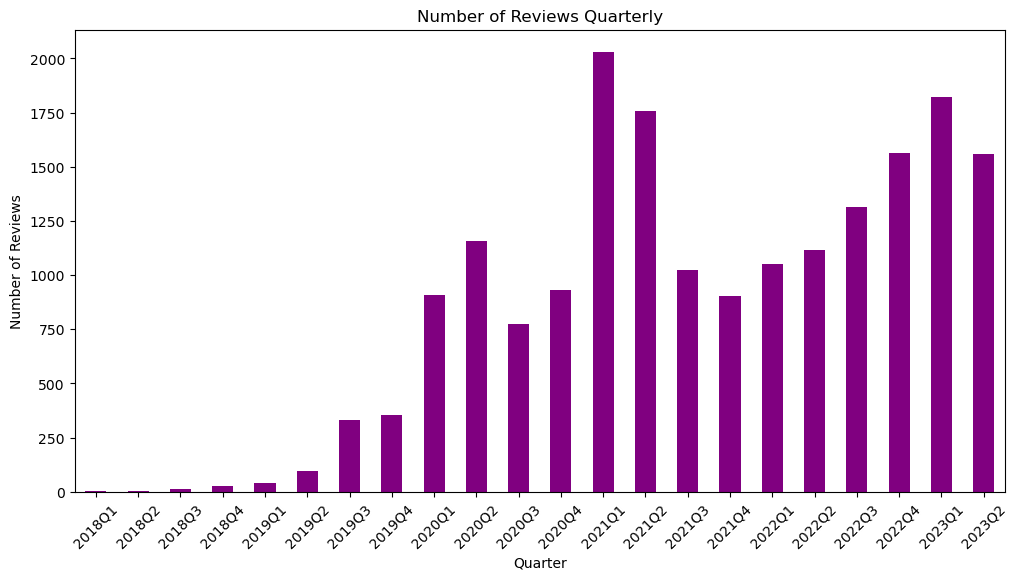

In [35]:
# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Convert the 'Date' column to a quarterly format
df['Quarter'] = df['Date'].dt.to_period('Q')

# Group the data by 'Quarter' and count the number of reviews for each quarter
reviews_per_quarter = df.groupby('Quarter').size()

# Plot the number of reviews quarterly
plt.figure(figsize=(12, 6))
reviews_per_quarter.plot(kind='bar', color='purple')
plt.xlabel('Quarter')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Quarterly')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

In [37]:
!pip install --upgrade plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 660.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/15.6 MB 656.4 kB/s eta 0:00:24
   ---------------------------------------- 0.1/15.6 MB 726.2 kB/s eta 0:00:22
   ---------------------------------------- 0.2/15.6 MB 893.0 kB/s eta 0:00:18
    --------------------------------------- 0.2/15.6 MB 1.1 MB/s eta 0:00:15
    --------------------------------------- 0.3/15.6 MB 1.0 MB/s eta 0:00:15
    --------------------------------------- 0.3/15.6 MB 896.4 kB/s eta 0:00:18
    ---------------------------------------

In [19]:
import pandas as pd
import plotly.graph_objects as go

# Load your Amazon reviews dataset into a DataFrame
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\22-Dec\\EDA\\Amazon_Tokenization.xlsx')

# Assuming you have 'Product Name' and 'Rating' columns
x = df['Product Name']
y = df['Rating']

# Create a bar chart using Plotly graph_objects
fig = go.Figure()

fig.add_trace(go.Bar(
    x=x,
    y=y,
    marker_color='#1f77b4'  # Set the color (similar to color_discrete_sequence)
))

# Set layout options
fig.update_layout(
    title='Interactive Bar Chart of Rating for Each Product',
    xaxis_title='Product Name',
    yaxis_title='Rating',
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the interactive plot
fig.show()


In [21]:
import pandas as pd
import plotly.express as px

# Load your Amazon reviews dataset into a DataFrame
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\22-Dec\\EDA\\Amazon_Tokenization.xlsx')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Format 'Date' column to show only month and year
df['Month_Year'] = df['Date'].dt.strftime('%b %Y')

# Create an interactive scatterplot using Plotly Express
fig = px.scatter(df, x='Month_Year', y='Product Name', color='Rating',
                 title='Interactive Scatterplot of Ratings for Each Product Over Time',
                 labels={'Product Name': 'Product', 'Month_Year': 'Month-Year', 'Rating': 'Rating'})

# Adjust layout and show the interactive plot
fig.update_layout(xaxis_title='Month-Year', yaxis_title='Product', margin=dict(l=20, r=20, t=50, b=20))
fig.show()
